In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
plt.rcParams["figure.figsize"] = (8, 5.5)
unwanted_rows = [0, 1, 2, 3, 4]
maturities = [2, 3, 5, 7, 10, 20, 30]
MAX_PCA_COMPONENTS = 3

In [128]:
raw_df = pd.read_csv('FRB_H15-2.csv')
df = raw_df.drop(unwanted_rows)

df.head()

,Series Description,"Market yield on U.S. Treasury securities at 2-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 3-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 5-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 7-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 10-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 20-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 30-year constant maturity, quoted on investment basis"
5,1962-01-02,NaN,3.70,3.88,NaN,4.06,4.07,NaN
6,1962-01-03,NaN,3.70,3.87,NaN,4.03,4.07,NaN
7,1962-01-04,NaN,3.69,3.86,NaN,3.99,4.06,NaN
8,1962-01-05,NaN,3.71,3.89,NaN,4.02,4.07,NaN
9,1962-01-08,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [129]:
df = df.rename(columns={'Series Description': 'Date', 'Market yield on U.S. Treasury securities at 2-year   constant maturity, quoted on investment basis': '2-YR', 'Market yield on U.S. Treasury securities at 3-year   constant maturity, quoted on investment basis': '3-YR', 'Market yield on U.S. Treasury securities at 5-year   constant maturity, quoted on investment basis': '5-YR', 'Market yield on U.S. Treasury securities at 7-year   constant maturity, quoted on investment basis': '7-YR', 'Market yield on U.S. Treasury securities at 10-year   constant maturity, quoted on investment basis': '10-YR', 'Market yield on U.S. Treasury securities at 20-year   constant maturity, quoted on investment basis': '20-YR', 'Market yield on U.S. Treasury securities at 30-year   constant maturity, quoted on investment basis': '30-YR'})
df = df.set_index('Date')
df.head()

,2-YR,3-YR,5-YR,7-YR,10-YR,20-YR,30-YR
Date,,,,,,,
1962-01-02,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [130]:
def clean(raw_dataset):
    print('Has NaNs? :', raw_dataset.isna().values.any())
    print('Size = ', raw_dataset.shape)
    print('Removing \'ND\' values')
    for column in raw_dataset.columns:
        raw_dataset = raw_dataset[raw_dataset[column].str.contains('ND') == False]
    print('Size = ', raw_dataset.shape)
    raw_dataset = raw_dataset.astype('float64')
    return raw_dataset

In [131]:
def plot(eigen_vectors, factors):
    for i in range(MAX_PCA_COMPONENTS):
        plt.plot(maturities, eigen_vectors[:, i] * factors[i], label='Component ' + str(i+1))
    plt.legend()
    plt.grid()
    plt.xticks(maturities)

In [132]:
def find_principal_components(start_date, end_date, factors=None, use_correlation = False):
    if factors is None:
        factors = [1, 1, 1]
    raw_dataset = df[start_date: end_date][:]
    dataset = clean(raw_dataset)
    dataset = dataset.diff().dropna()
    if use_correlation:
        eigen_values, eigen_vectors = np.linalg.eig(dataset.corr())
    else:
        eigen_values, eigen_vectors = np.linalg.eig(dataset.cov())
    plt.title('PCA Analysis from ' + start_date + ' to ' + end_date)
    plot(eigen_vectors, factors)
    plt.show()

Has NaNs? : False
Size =  (262, 7)
Removing 'ND' values
Size =  (251, 7)


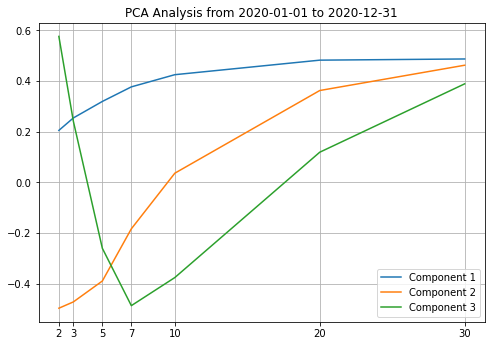

Has NaNs? : False
Size =  (262, 7)
Removing 'ND' values
Size =  (251, 7)


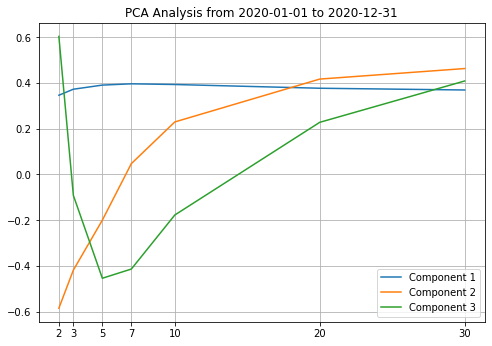

In [135]:
find_principal_components('2020-01-01', '2020-12-31', factors=[1, -1, -1])
find_principal_components('2020-01-01', '2020-12-31', factors=[1, 1, 1], use_correlation=True)

Has NaNs? : False
Size =  (261, 7)
Removing 'ND' values
Size =  (251, 7)


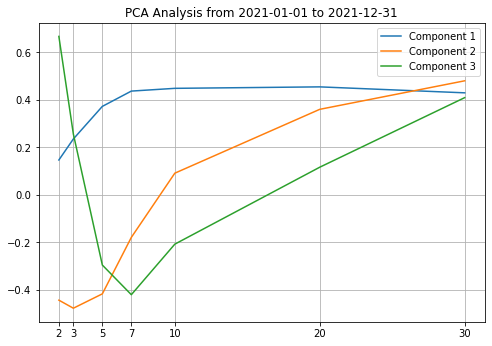

Has NaNs? : False
Size =  (261, 7)
Removing 'ND' values
Size =  (251, 7)


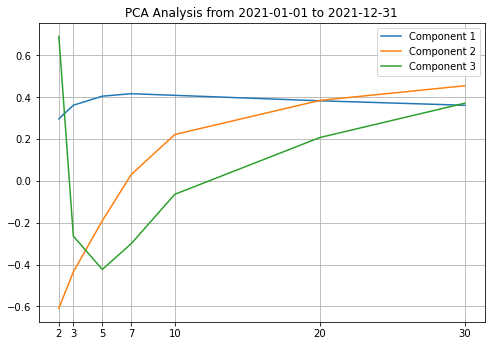

In [138]:
find_principal_components('2021-01-01', '2021-12-31', factors=[1, -1, -1], use_correlation=False)
find_principal_components('2021-01-01', '2021-12-31', factors=[-1, -1, -1], use_correlation=True)

Has NaNs? : False
Size =  (165, 7)
Removing 'ND' values
Size =  (159, 7)


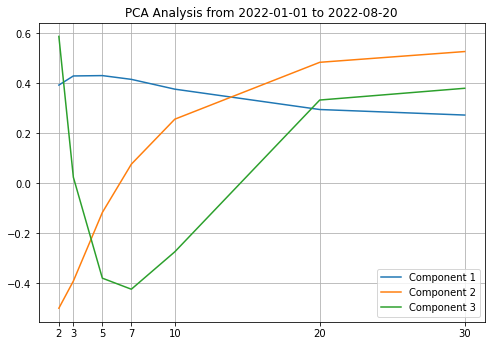

Has NaNs? : False
Size =  (165, 7)
Removing 'ND' values
Size =  (159, 7)


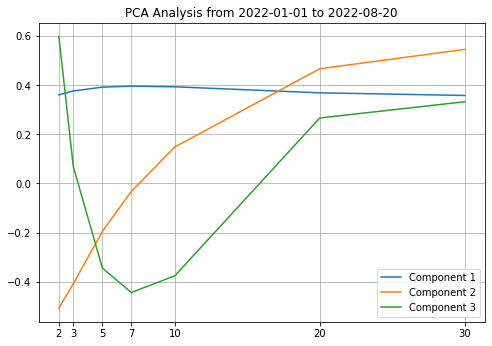

In [142]:
find_principal_components('2022-01-01', '2022-08-20', factors=[-1, 1, -1], use_correlation=False)
find_principal_components('2022-01-01', '2022-08-20', factors=[-1, -1, -1], use_correlation=True)

Has NaNs? : False
Size =  (165, 7)
Removing 'ND' values
Size =  (159, 7)


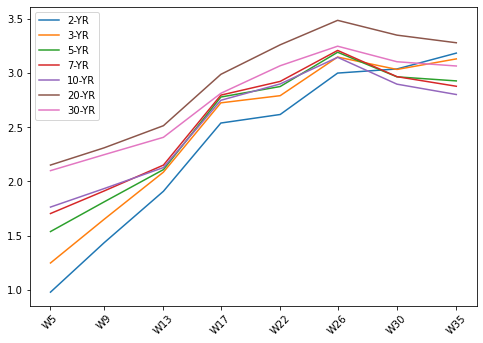

In [143]:
yield_info = df['2022-01-01': '2022-08-20'][:]
yield_info = clean(yield_info)
yield_info.index = pd.to_datetime(yield_info.index)
yield_info = yield_info.resample('M').mean()
for maturity in maturities:
    plt.plot(yield_info.index, yield_info[str(maturity) + '-YR'], label=str(maturity) + '-YR')
plt.legend()
plt.xticks(yield_info.index, labels=['W' + str(w.week) for w in yield_info.index], rotation=45)
plt.show()